In [8]:
#Convolution example

import tensorflow as tf
import numpy as np

#image형태
#1장의 이미지는 3차원형태의 데이터
#(이미지의 개수, width, height, color)
#(1,3,3,1)
image = np.array([[[[1],[2],[3]],
                  [[4],[5],[6]],
                  [[7],[8],[9]]]], dtype=np.float32)  #(list안에 list넣어서 4차원의 np.array만들기)
print(image.shape)
#필터를 준비해야해요
#(Width, height, color, 필터의 개수)
#(2,2,1,1)

weight = np.array([[[[1]],[[1]]],
                   [[[1]],[[1]]]])

print(weight.shape)
#원본이미지 만들었고, 필터 만들었어요 => mapping시켜요!
#mapping을 얼마의 간격으로 할건지도 정해요 - stride
#stride지정(사실 2차원이면 되는데 행렬곱 연산을 위해서 어쩔수 없이 4차원으로 만들어줘야한다. (2개는 사용되지 않음)
##(1, stride width, stride height, 1)4차원으로 표현
#stride = [1,1,1,1] #가운데 있는 '1' 2개만 의미 있는거임

#conv2d = 한칸씩 점프하면서 결과데이터 뽑을 수 있는 함수  padding="VALID" 하면 패딩하지마. size가 줄어. (padding="SAME": 패딩해라/원본 image와 conv image은 size같음)
conv2d=tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding="VALID")
print(conv2d.shape)

(1, 3, 3, 1)
(2, 2, 1, 1)
(1, 2, 2, 1)


In [9]:
#Convolution example

import tensorflow as tf
import numpy as np

#image형태
#1장의 이미지는 3차원형태의 데이터
#(이미지의 개수, width, height, coloer)
#(1,3,3,1)
image = np.array([[[[1],[2],[3]],
                  [[4],[5],[6]],
                  [[7],[8],[9]]]], dtype=np.float32)  #(list안에 list넣어서 4차원의 np.array만들기)
print(image.shape)
#필터를 준비해야해요
#(Width, height, color, 필터의 개수)
#(2,2,1,3)

weight = np.array([[[[1,-5,10]],[[1,-5,10]]],
                   [[[1,-5,10]],[[1,-5,10]]]])

print(weight.shape)
#원본이미지 만들었고, 필터 만들었어요 => mapping시켜요!
#mapping을 얼마의 간격으로 할건지도 정해요 - stride
#stride지정(사실 2차원이면 되는데 행렬곱 연산을 위해서 어쩔수 없이 4차원으로 만들어줘야한다. (2개는 사용되지 않음)
##(1, stride width, stride height, 1)4차원으로 표현
#stride = [1,1,1,1] #가운데 있는 '1' 2개만 의미 있는거임

#conv2d = 한칸씩 점프하면서 결과데이터 뽑을 수 있는 함수  padding="VALID" 하면 패딩하지마. size가 줄어. (padding="SAME": 패딩해라/원본 image와 conv image은 size같음)
conv2d=tf.nn.conv2d(image, weight, strides=[1,1,1,1], padding="VALID")
print(conv2d.shape)

(1, 3, 3, 1)
(2, 2, 1, 3)
(1, 2, 2, 3)


Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz


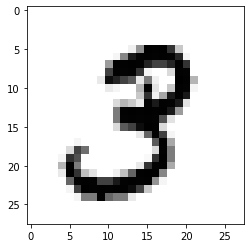

(5, 14, 14, 1)


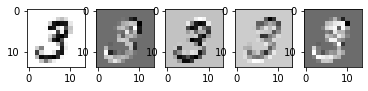

In [28]:
#MNIST 예제를 이용해서 하나의 이미지에 대한
#convolutional image 5개를 생성해 보아요!
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf
import matplotlib.pyplot as plt


#Data Loading
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)  #실제로 Data만들어지고 압축파일로 쇽 들어감
#Y축 label이 one_hot=True으로 생성되어 딸려나옴.

#mnist의 학습용이미지의 images(이미지에 대한 정보 싹 들고 있는애)의 2번째 . 즉
#training 이미지 중 2번째 이미지의 정보를 얻어와요!

img = mnist.train.images[1]
#print(img.shape)  #(784,) 튜플형태의 1차원 배열 데이터
#2차원 형태로 바꾸자
img = img.reshape(28,28)     #2차원 데이터로 변환
plt.imshow(img, cmap="Greys", interpolation="nearest")    #이미지를 그리자!
plt.show()

#해당 이미지를 convolution 이미지로 변형
#2차원 형태의 img를 4차원 형태의 img로 변환
img =img.reshape(-1,28,28,1)   #(28,28)인 2차원을 4차원으로 바꾸자

#이미지가 준비되었으니 필터를 준비
#5개의 필터를 이용, 2x2짜리 필터를 이용
#(2,2,1,5) (필터의 가로, 필터의 세로, depth(칼라), 필터(depth)) 필터의 

W=tf.Variable(tf.random_normal([2,2,1,5]),name="filter")
conv2d=tf.nn.conv2d(img,W,strides=[1,2,2,1], padding="SAME")    #2칸씩 움직이는 strides(2,2)

#conv2d인 텐서플로 노드로 떨어진다.->sess.run으로 한번 실행시켜줘야 얘가 갖고 있는 배열 데이터를 얻을 수 있다.
sess=tf.Session()
sess.run(tf.global_variables_initializer())
conv2d=sess.run(conv2d)
conv2d=np.swapaxes(conv2d,0,3)


print(conv2d.shape)

#(1, 14, 14, 5) = 14x14짜리 이미지가 5개 생성
#새로 생성된 이미지를 plt를 이용하여 확인

#배열의 축을 임의로 변경 - loop을 돌려야지 5개의 image를 화면에 찍을 수 있어서 loop을 돌리기 위해서
#(1, 14, 14, 5) = (5, 14, 14, 1)
# conv2d=np.swapaxes(conv2d,0,3)    #conv2d 인덱스 0과3을 스와핑시키자........ 1과 5의 위치를 바꾸자.
# print(conv2d.shape)
fig,axes=plt.subplots(1,5) #1행 5열짜리 subpolt을 생성   #axes는 subplot의 배열 (각각의 subplot에 대한 array)


#enumerate 는 conv2d에 대한 데이터 툭툭 뽑으면서 index까지 같이 뽑음
for idx,item in enumerate(conv2d):
    axes[idx].imshow(item.reshape(14,14), cmap="Greys")
plt.show()


In [50]:
%%time

####MNIST with CNN
from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

#하나의 convolution layer 작업 (CONV - RELU - MAXpooling)
# 0. tensorflow 그래프 초기화 
tf.reset_default_graph()


##1. Data Loading & Data 정제
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)  #multinomial이니끼ㅏ one_hot encoding



## 2. placeholder설정  --placeholder를 통해서 데이터를 받아서 그 다음이 진행되는거임.
X = tf.placeholder(shape=[None,784], dtype=tf.float32)
Y= tf.placeholder(shape=[None,10], dtype=tf.float32)
drop_rate = tf.placeholder(dtype=tf.float32)


## 3. Convolution -Convolution은 image를 (x길이,y길이,이미지,컬럼) 4차원 형태로 표시
#근데 placeholder 에 받아지는 데이터는 2차원 ->이걸 4차원형태로 바꿔야 한다.
#입력데이터를 x_img 해서 4차원 형태로 받자. ->tf가 가지는 reshape란 함수를 사용 (x에 대한 shape 바꾸자)
## 3.1 Convolution layer   
x_img = tf.reshape(X,[-1,28,28,1])  #입력데이터를 (image의 개수, 가로, 세로, 컬럼-흑백이니까1)으로 reshape하자!
#필터를 하나 만들겁니다 필터에 대한 데이터를 랜덤함수로 추출[2, 2, 1:이미지 색(흑백),  32(32개의 필터)]
W1 = tf.Variable(tf.random_normal([2,2,1,32]),name = "filter1")
L1 = tf.nn.conv2d(x_img,W1,strides=[1,2,2,1], padding ="SAME")

print(L1.shape)
#(?, 14, 14, 32) 필터32개 :32개의 image 14X14:(가로 14 세로 14)의 이미지.

#CONV 작업 끝나면 RELU작업 해야함(쉽게 말해 sigmoid 작업. => sigmoid는 0~1사이의 값이라 계속 하면 0에 수렴하기때문에 sigmoid 안씀)
L1= tf.nn.relu(L1)

#맥스풀링 (렐루한 결과값 L1과 ksize) -큰거 만 딱딱 샘플링 가자
L1= tf.nn.max_pool(L1,ksize=[1,2,2,1],
                  strides=[1,2,2,1], padding="SAME")  
print(L1.shape)
#(?, 7, 7, 32)
# #####3.2 Convolution layer2
#여기의 w값은 필터값을 랜덤하게 가기위한.
W2 = tf.Variable(tf.random_normal([3,3,32,64]),name = "filter1")  #입력으로 들어오는 32맞춰
L2 = tf.nn.conv2d(L1,W2,strides=[1,1,1,1], padding ="SAME")  #스트라이드 1칸씩 가자

print(L2.shape)
L2= tf.nn.relu(L2)
#맥스풀링 (렐루한 결과값 L1과 ksize) -큰거 만 딱딱 샘플링 가자
L2= tf.nn.max_pool(L2,ksize=[1,1,1,1],
                  strides=[1,1,1,1], padding="SAME")   ##stride 한칸씩만가자   
print(L2.shape)
L2 = tf.reshape(L2,[-1,7*7*64])  #4차원짜리를 2차원으로 바꿔야해.. "컬럼수":7x7x64

##4. Neural Network 으로 돌아와야하니까 원래형태 2차원으로 바꺼
##4.1 Weight &bias
#여기의 W는 밑에는 weight 계산하는거니까 get_variable(xavier_initializer() 사용)
W3 = tf.get_variable("weight3", shape=[7*7*64,256], initializer=tf.contrib.layers.xavier_initializer())


Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
(?, 14, 14, 32)
(?, 7, 7, 32)
(?, 7, 7, 64)
(?, 7, 7, 64)
Wall time: 878 ms


In [ ]:
# 초기 weight값을 0으로 주면 초기화 잘 안댐 >> 수학적으로 증명됨;
# >> 그럼 어떻게 할까? >> 랜덤을 쓰지 말고 RBM 이라는 알고리즘에 따라 초기값을 부여하면 좀더 학습이 나아짐.
# tf.Variable(tf.random_normal([784,256]), name="weight1") >> tf.get_variable("weight1", shape=[784,286],tf.contrib.layers.xavier_initializer())  (자비에(Xavier) 초기화법)